In [ ]:
import pandas as pd #Importando a biblioteca pandas

In [ ]:
import numpy as np #Importando a biblioteca numpy

In [ ]:
import matplotlib.pyplot as plt #Importando a biblioteca matplot

In [ ]:
import seaborn as sns #Importando a biblioteca seaborn

In [ ]:
from sklearn.metrics import classification_report #Cria um relatório de texto mostrando as principais métricas de classificação.

In [ ]:
from sklearn.model_selection import train_test_split #Divide matrizes em subconjuntos aleatórios de treinamento e teste

In [ ]:
from sklearn.preprocessing import StandardScaler # Padroniza recursos removendo a média e dimensionando para a variação da unidade

In [ ]:
from sklearn.linear_model import LinearRegression #Ajusta um modelo linear de acordo com os coeficientes 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #Erro Quadrático Médio|| Erro Absoluto Médio || Função de pontuação de regressão

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Classificador implementando o voto dos k-vizinhos mais próximos.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Padronização de recursos || Tranformação de recursos

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import svm # SupportVector Machine (Máquina de Vetores de Suporte)

In [ ]:
import warnings
warnings.filterwarnings("ignore") # Verifica os tipos de argumentos e compila as expressões

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Classificador da árvore de decisão

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Ajusta os classificadores de árvore de decisão em subamostrar do dataframe

In [ ]:
from sklearn.tree import plot_tree #Plota a árvore de decisão

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix # Pontuação de classificação de precisão || Calcula a matriz de confusão para avaliar a precisão de uma classificação.

# Relembrando o Dataframe




In [ ]:
dados = pd.read_csv("dados_rh_pos_analise.csv") #Lendo o dataframe

In [ ]:
dados.columns #Verificando quais são as colunas

Index(['Unnamed: 0', 'id_empregado', 'departamento', 'regiao', 'educacao',
       'genero', 'canal_de_recrutamento', 'n_de_treinamentos', 'idade',
       'pontuacao_ano_anterior', 'tempo_de_servico', 'KPIs >80%',
       'venceu_premiacoes?', 'pontuacao_media_treinamentos', 'foi_promovido'],
      dtype='object')

In [ ]:
dados.head() #Mostrando as 5 primeiras linhas

,Unnamed: 0,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
0,0,65438,Vendas & Marketing,regiao_7,Mestrado & acima,F,processo seletivo,1,35,5.0,8,1,0,49,0
1,1,65141,Operacoes,regiao_22,Bacharelado,M,outros,1,30,5.0,4,0,0,60,0
2,2,7513,Vendas & Marketing,regiao_19,Bacharelado,M,processo seletivo,1,34,3.0,7,0,0,50,0
3,3,2542,Vendas & Marketing,regiao_23,Bacharelado,M,outros,2,39,1.0,10,0,0,50,0
4,4,48945,Tecnologia,regiao_26,Bacharelado,M,outros,1,45,3.0,2,0,0,73,0


In [ ]:
dados.tail() #Mostrando as 5 últimas linhas

,Unnamed: 0,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
54803,54803,3030,Tecnologia,regiao_14,Bacharelado,M,processo seletivo,1,48,3.0,17,0,0,78,0
54804,54804,74592,Operacoes,regiao_27,Mestrado & acima,F,outros,1,37,2.0,6,0,0,56,0
54805,54805,13918,Analise,regiao_1,Bacharelado,M,outros,1,27,5.0,3,1,0,79,0
54806,54806,13614,Vendas & Marketing,regiao_9,Outros,M,processo seletivo,1,29,1.0,2,0,0,45,0
54807,54807,51526,RH,regiao_22,Bacharelado,M,outros,1,27,1.0,5,0,0,49,0


In [ ]:
dados.dtypes #Verificando os tipos de dados das colunas

Unnamed: 0                        int64
id_empregado                      int64
departamento                     object
regiao                           object
educacao                         object
genero                           object
canal_de_recrutamento            object
n_de_treinamentos                 int64
idade                             int64
pontuacao_ano_anterior          float64
tempo_de_servico                  int64
KPIs >80%                         int64
venceu_premiacoes?                int64
pontuacao_media_treinamentos      int64
foi_promovido                     int64
dtype: object

In [ ]:
dados.nunique() #Verificando os valores únicos de colunas

Unnamed: 0                      54808
id_empregado                    54808
departamento                        9
regiao                             34
educacao                            4
genero                              2
canal_de_recrutamento               3
n_de_treinamentos                  10
idade                              41
pontuacao_ano_anterior              6
tempo_de_servico                   35
KPIs >80%                           2
venceu_premiacoes?                  2
pontuacao_media_treinamentos       61
foi_promovido                       2
dtype: int64

In [ ]:
dados.shape #Mostrando o tamanho do dataframe

(54808, 15)

In [ ]:
dados.describe()#Descrição detalhada 

,Unnamed: 0,id_empregado,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,27403.500000,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,15821.851114,22586.581449,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,13701.750000,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,27403.500000,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,41105.250000,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,54807.000000,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
dados.isnull().sum() #Verificando a existência de valores nulos (Limpeza de dados feita no Sprint 3 )

Unnamed: 0                      0
id_empregado                    0
departamento                    0
regiao                          0
educacao                        0
genero                          0
canal_de_recrutamento           0
n_de_treinamentos               0
idade                           0
pontuacao_ano_anterior          0
tempo_de_servico                0
KPIs >80%                       0
venceu_premiacoes?              0
pontuacao_media_treinamentos    0
foi_promovido                   0
dtype: int64

In [ ]:
dados['educacao'].value_counts() #Verificando a quantidade de pessoas em cada tipo de escolaridade

Bacharelado               36669
Mestrado & acima          14925
Outros                     2409
Abaixo do ensino medio      805
Name: educacao, dtype: int64

In [ ]:
dados['pontuacao_ano_anterior'].value_counts() #Verificando a quantidade de pessoas de acordo com a pontuação de 1.0 a 5.0

3.000000    18618
5.000000    11741
4.000000     9877
1.000000     6223
2.000000     4225
3.329256     4124
Name: pontuacao_ano_anterior, dtype: int64

In [ ]:
dados['departamento'].value_counts() #Verificando a quantidade de pessoas em cada departamento

Vendas & Marketing            16840
Operacoes                     11348
Tecnologia                     7138
Compras                        7138
Analise                        5352
Financeiro                     2536
RH                             2418
Legal                          1039
Pesquisa & Desenvolvimento      999
Name: departamento, dtype: int64

In [ ]:
dados['regiao'].value_counts() #Verificando a quantidade de pessoas em cada região

regiao_2     12343
regiao_22     6428
regiao_7      4843
regiao_15     2808
regiao_13     2648
regiao_26     2260
regiao_31     1935
regiao_4      1703
regiao_27     1659
regiao_16     1465
regiao_28     1318
regiao_11     1315
regiao_23     1175
regiao_29      994
regiao_32      945
regiao_19      874
regiao_20      850
regiao_14      827
regiao_25      819
regiao_17      796
regiao_5       766
regiao_6       690
regiao_30      657
regiao_8       655
regiao_10      648
regiao_1       610
regiao_24      508
regiao_12      500
regiao_9       420
regiao_21      411
regiao_3       346
regiao_34      292
regiao_33      269
regiao_18       31
Name: regiao, dtype: int64

In [ ]:
dados['genero'].value_counts() #Verificando a quantidade de gêneros

M    38496
F    16312
Name: genero, dtype: int64

In [ ]:
dados['canal_de_recrutamento'].value_counts() #Verificando a forma de como foram contratados

outros               30446
processo seletivo    23220
indicacao             1142
Name: canal_de_recrutamento, dtype: int64

In [ ]:
dados['n_de_treinamentos'].value_counts() #Verificando a quantidade de vezes que passaram por um treinamento

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: n_de_treinamentos, dtype: int64

In [ ]:
dados['pontuacao_media_treinamentos'].value_counts() #Verificando a pontuação média dos treinamentos

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: pontuacao_media_treinamentos, Length: 61, dtype: int64

In [ ]:
dados['idade'].value_counts() #Verificando a quantidade de pessoas com a respectiva idade       

30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: idade, dtype: int64

In [ ]:
dados['tempo_de_servico'].value_counts() #Verificando o tempo de serviço das pessoas

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: tempo_de_servico, dtype: int64

In [ ]:
dados['venceu_premiacoes?'].value_counts() #Verificando se as pessoas ganharam alguma premiação

0    53538
1     1270
Name: venceu_premiacoes?, dtype: int64

In [ ]:
dados['KPIs >80%'].value_counts() #Verificando se as pessoas possuem um KPI maior do que 80%

0    35517
1    19291
Name: KPIs >80%, dtype: int64

In [ ]:
dados['foi_promovido'].value_counts() #Verificando a quantidade de pessoas que foram promovidas

0    50140
1     4668
Name: foi_promovido, dtype: int64

# Utilizando Algoritmos supervisionados - Regressão


Regressão Simples


In [ ]:
#Dado e Label

X = np.array(dados['idade']).reshape(-1, 1)
y = dados['tempo_de_servico']

#Treino e teste

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
#Criação do modelo linear simples

reta = LinearRegression()
reta.fit(X_train, y_train)
y_pred = reta.predict(X_test)

In [ ]:
#Avaliando o modelo

mse = mean_squared_error(y_test, y_pred) # Erro Quadrático Médio - Penaliza erros maiores
mae = mean_absolute_error(y_test, y_pred) # Erro Absoluto Médio - Realiza a média do erro absoluto
r2 = r2_score(y_test, y_pred) # Indicador de qualidade do modelo ( Quanto maior o valor, melhor o modelo)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 10.46944968807384
MAE: 2.4117604343846626
R²: 0.4229890605060699


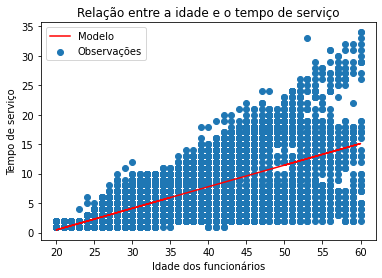

In [ ]:
#Plotagem

plt.scatter(X_test, y_test, label ='Observações')
plt.plot (X_test, y_pred, label='Modelo', color = 'red')
plt.xlabel('Idade dos funcionários')
plt.ylabel('Tempo de serviço')
plt.title('Relação entre a idade e o tempo de serviço')
plt.legend()
plt.show()


Regressão Múltipla


In [ ]:
#Transformando String em Integer
def sexo(x):
  if x=='M':
    return 0
  else:
    return 1

dados['genero'] = dados['genero'].apply(sexo)

In [ ]:
#Dados e label

X = dados.drop(columns=['departamento', 'regiao','educacao', 'canal_de_recrutamento'])
y = dados['genero']



In [ ]:
# TREINO e TESTE

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
#Padronização de dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Criação do modelo

reta2 = LinearRegression()
reta2.fit(X_train_scaled, y_train)
y_pred = reta2.predict(X_test_scaled)

In [ ]:
#Avaliando o modelo

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 1.1917016852943126e-31
MAE: 2.625934364909644e-16
R²: 1.0


In [ ]:
#Verificando os coeficientes
reta2.coef_

array([-2.30173980e-17,  5.55111512e-17,  4.56595261e-01,  2.15105711e-16,
        3.46944695e-18,  1.90819582e-16, -1.73472348e-17,  0.00000000e+00,
       -4.77048956e-17, -1.52655666e-16, -9.71445147e-17])

In [ ]:
# Onde o modelo corta o eixo y?
reta2.intercept_

0.2962335462009645

# Utilizando Algoritmos supervisionados - Classificação

In [ ]:
#Utilizando as colunas: Número de treinamenos, idade e pontuação do ano anterior
data = dados.iloc[:,[8,9]]
labels = dados.iloc[:,[10]]

In [ ]:
#Treino e teste
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
#Prints dos treinos e testes
print('N dados : ', len(data))
print('X_train : ', len(X_train))
print('X_test : ', len(X_test))
print('y_train : ', len(y_train))
print('y_test : ', len(y_test))

N dados :  54808
X_train :  38365
X_test :  16443
y_train :  38365
y_test :  16443


KNN com dados FORA DE ESCALA

In [ ]:
# Define o modelo preditivo
modelo = KNeighborsClassifier(n_neighbors=5)

# Treina o modelo
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"ACC: {acc:.4f}")

ACC: 0.2233


In [ ]:
def meu_knn(X_tr, X_ts, y_tr, y_ts, k=0):

  #Definindo o modelo preditivo
  if k==0:
    k = int( (len(y_tr)+len(y_ts)) ** 0.5 )

  modelo = KNeighborsClassifier(n_neighbors=k)

  #Treinando o modelo
  modelo.fit(X_tr, y_tr)

  #Avaliando o modelo
  y_pred = modelo.predict(X_ts)
  acc = metrics.accuracy_score(y_ts, y_pred)
  
  print(f"k:{k}\tACC: {acc:.4f}")

In [ ]:
meu_knn(X_train, X_test, y_train, y_test, 5)

k:5	ACC: 0.2233


In [ ]:
meu_knn(X_train, X_test, y_train, y_test, 7)

k:7	ACC: 0.2250


In [ ]:
meu_knn(X_train, X_test, y_train, y_test, 9)

k:9	ACC: 0.2282


In [ ]:
meu_knn(X_train, X_test, y_train, y_test)

k:234	ACC: 0.2369


KNN com DADOS ESCALADOS

In [ ]:
#Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
meu_knn(X_train_scaled, X_test_scaled, y_train, y_test, 0)

k:234	ACC: 0.2470


In [ ]:
#Normalizando os dados
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
meu_knn(X_train_norm, X_test_norm, y_train, y_test, 0)

k:234	ACC: 0.2479


Árvores de decisão

In [ ]:
#Separando colunas do Dataframe
df = dados[ ['genero', 'venceu_premiacoes?','tempo_de_servico', 'idade', 'pontuacao_media_treinamentos','foi_promovido','KPIs >80%'] ]


In [ ]:
df.sample(10)

,genero,venceu_premiacoes?,tempo_de_servico,idade,pontuacao_media_treinamentos,foi_promovido,KPIs >80%
25714,0,0,1,28,49,0,0
27102,0,0,3,34,68,0,1
11581,0,0,1,31,87,0,0
22618,0,0,2,26,50,0,0
19964,0,0,10,37,87,0,0
37938,0,0,2,28,62,0,1
33611,0,1,9,35,94,1,1
855,1,0,4,36,81,1,0
5893,1,0,8,34,58,1,1
51566,0,0,2,27,85,0,1


In [ ]:
#Dados e label

X = df.drop(columns=['foi_promovido'])
y = df['foi_promovido']

#Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
#Prints dos treinos e testes
print(len(X))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

54808
38365
16443
38365
16443


In [ ]:
#Criando a árvore de decisão
modelo = DecisionTreeClassifier( max_depth=3 )
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

accuracy_score(y_test, y_pred)

0.9272638812868698

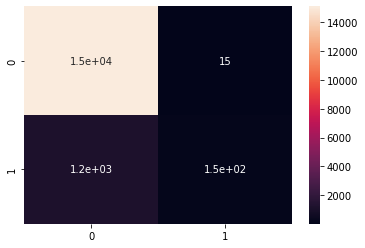

In [ ]:
#Criando a matriz de confusão
m = confusion_matrix(y_true=y_test,
                 y_pred=y_pred,
                 labels=[0, 1])

sns.heatmap(m, annot=True)

In [ ]:
#Utilizando métricas de precisão, revocação, f1-score e acurácia
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15110
           1       0.91      0.11      0.20      1333

    accuracy                           0.93     16443
   macro avg       0.92      0.56      0.58     16443
weighted avg       0.93      0.93      0.90     16443



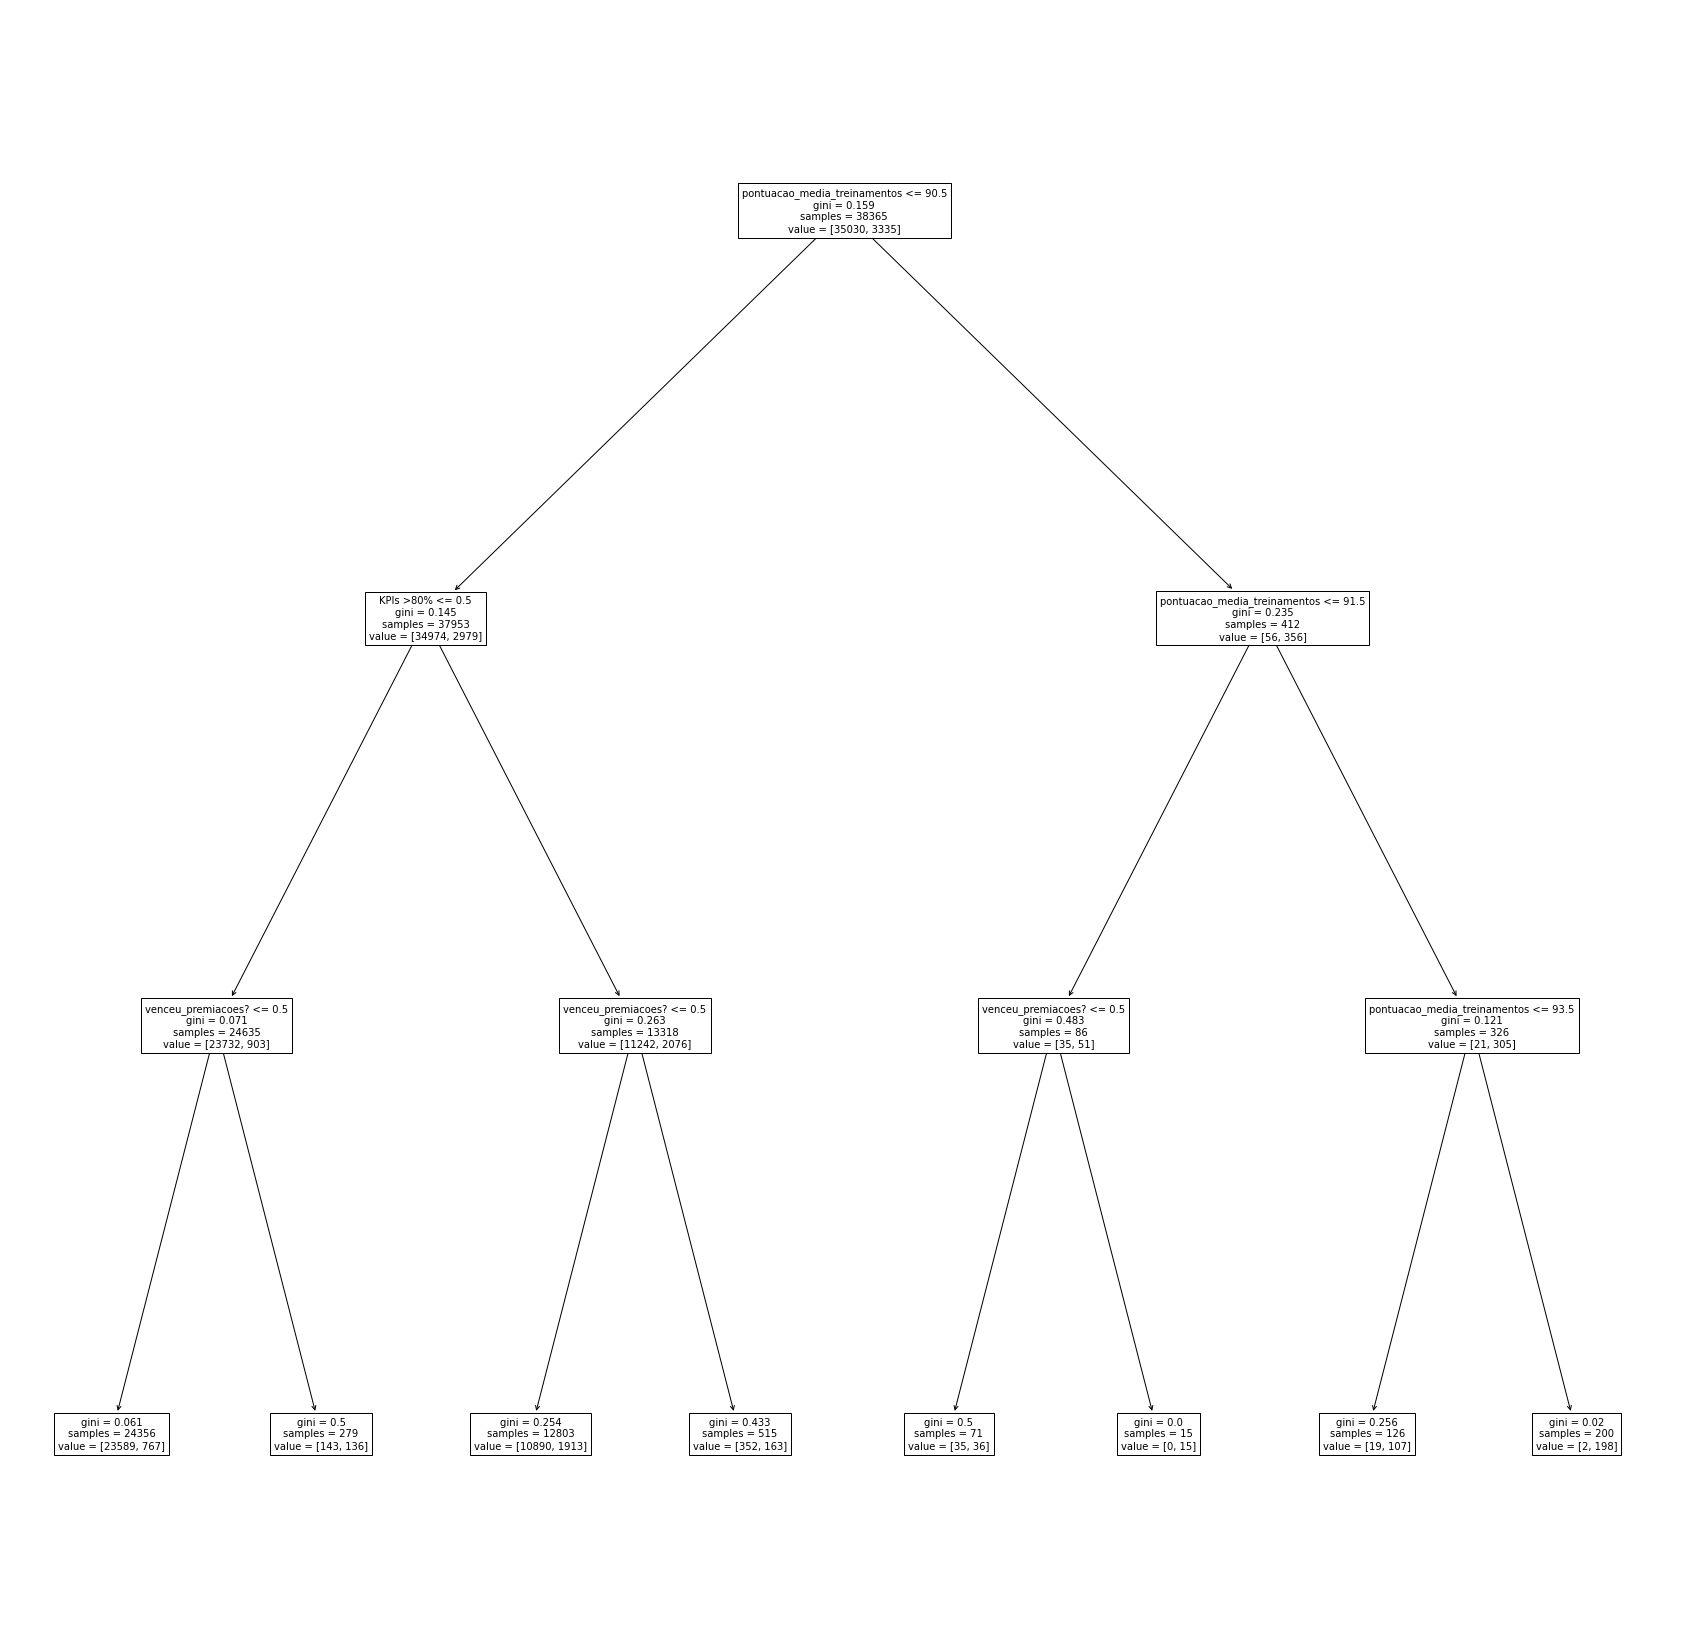

In [ ]:
# Plotagem
plt.figure(figsize=(30, 30))
plot_tree(modelo, fontsize=10, feature_names=X_train.columns)
plt.show()

In [ ]:
#Floresta aleatória

rf = RandomForestClassifier(n_estimators=50, max_depth=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9267773520647083

In [ ]:
# Comparação de modelos
modelos = [ (DecisionTreeClassifier(), '1 árvore'),
            (RandomForestClassifier(n_estimators=5, max_depth=5), '5 árvores'), 
            (RandomForestClassifier(n_estimators=10, max_depth=5), '10 árvores'), 
            (RandomForestClassifier(n_estimators=25, max_depth=5), '25 árvores'), 
            (RandomForestClassifier(n_estimators=50, max_depth=5), '50 árvores'), 
            (RandomForestClassifier(n_estimators=100, max_depth=5), '100 árvores')
            ]

for modelo, nome in modelos:
  modelo.fit(X_train, y_train)
  preds = modelo.predict(X_test)
  acc = accuracy_score(y_test, preds)

  print(f"acc: {acc} | {nome}")

acc: 0.8944231587909749 | 1 árvore
acc: 0.9273855135924102 | 5 árvores
acc: 0.9277504105090312 | 10 árvores
acc: 0.9275679620507207 | 25 árvores
acc: 0.9276287782034909 | 50 árvores
acc: 0.9279936751201119 | 100 árvores


SVM

In [ ]:
#Separando o Dataframe
x = dados.drop(columns=['KPIs >80%'])
y = dados['KPIs >80%']

In [ ]:
#Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [ ]:
#Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Construção do SVM
modelo = svm.SVC( C=0.1, gamma=1, kernel='linear' )
modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)

In [ ]:
#Avaliação do modelo
print('      ACC: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('   Recall: ', metrics.recall_score(y_test, y_pred))

      ACC:  1.0
Precision:  1.0
   Recall:  1.0


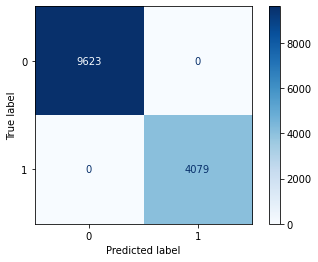

In [ ]:
#Construção da matriz de confusão

metrics.plot_confusion_matrix(modelo,         
                              X_test_scaled,  
                              y_test,         
                              cmap="Blues")   

Algoritmos de Regressão 

*Regressão Linear*

Antes de analisar o gráfico, devemos entender o modelo de avaliação apresentado, para isso utilizamos o Mean Absolute Error (MSE), Mean Squared Error (MSE) e o R². O MSE ele penaliza erros maiores, no caso, a diferença entre o valor previsto e o correto. O MAE faz a média do erro absoluto de cada previsão, facilitando a interpretação do modelo real. Por fim o R², onde indica a qualidade do modelo, o qual, quanto maior o número, melhor é o modelo
*Resultados apresentados no código

A regressão linear é um modelo de estatística, o qual, possui o objetivo de indicar o comportamento de uma varíavel, no caso, o "y", com a função que contém outras variáveis independentes, no caso, o "x". No case analisado, utilizamos a idade dos funcionários em relação ao tempo de serviço dentro da empresa, apresentando uma relação positiva, pois o valor da idade dos funcionarios é maior em relação ao tempo de serviço apresentado.

Algoritmos de Regressão

*KNN*

O K-Nearest neighbors, classifica cada amostra de um grupo de dados e classifica a sua distância em relação aos "neighbors". No caso acima, utilizamos a machine learning para identificar os vizinhos mais próximos dentro do .csv e a sua acurácia

*Árvores de decisão*

As árvores de decisão é um modelo, o qual, são treinadas a partir de um grupo de dados previamente classificados. Nós utilizados apenas uma parte do DataFrame original, escolhendo algumas colunas específicas, no caso: gênero, venceu premiações, tempo de serviço, idade, pontuação média, foi promovido e o KPIs > 80%. Sabendo disso, a relação entre eles, podem serem estabelecidas

*Florestas Aleatórias*

As florestas aleatórias é um algoritmo preciso, simples e flexível. Uma floresta aleatória é composta por várias árvores de decisão aleatoriamente e no Sprint entregue, comparamos os modelos entre as Florestas, alterando o valor padrão dos parâmetros que controlam o tamanho das árvores (Alteramos os valores para: 5, 10, 15, 25, 50 e 100 árvores. 

*SVM*

o Support Vector Machine é um algoritmo utilizado para classificar dois grupos de dados diferentes. Ele busca criar uma linha, o qual, separa as os grupos distintos, tendo como base, os dois pontos mais próximos do grupo. Após a análisa da machine learning, vimos que os dados estão extremamente precisos segundo as métricas de precisão, recall e acurácia.

